In [55]:
# Run this in Google Colab
!pip install tensorflow matplotlib


In [56]:
!pip install scipy

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks

In [58]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
DATASET_PATH = './dataset'  # Updated to match your actual dataset folder name

# Display the configuration
print("Model Configuration:")
print(f"- Image Size: {IMG_SIZE}")
print(f"- Batch Size: {BATCH_SIZE}")
print(f"- Dataset Path: {DATASET_PATH}")

# Check if dataset path exists
import os
if os.path.exists(DATASET_PATH):
    print(f" Dataset path exists: {DATASET_PATH}")
    folders = [f for f in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, f))]
    print(f"Found folders: {folders}")
else:
    print(f" Dataset path not found: {DATASET_PATH}")
    print("Please check your dataset path!")

Model Configuration:
- Image Size: (64, 64)
- Batch Size: 32
- Dataset Path: ./dataset
 Dataset path exists: ./dataset
Found folders: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [59]:

#show grap for the dataset
def show_dataset_graph():
    class_names = os.listdir(DATASET_PATH)
    num_classes = len(class_names)
    print(f"Number of classes: {num_classes}")
    
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, [len(os.listdir(os.path.join(DATASET_PATH, cls))) for cls in class_names])
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Dataset Distribution')
    plt.xticks(rotation=45)
    plt.show()



Number of classes: 10


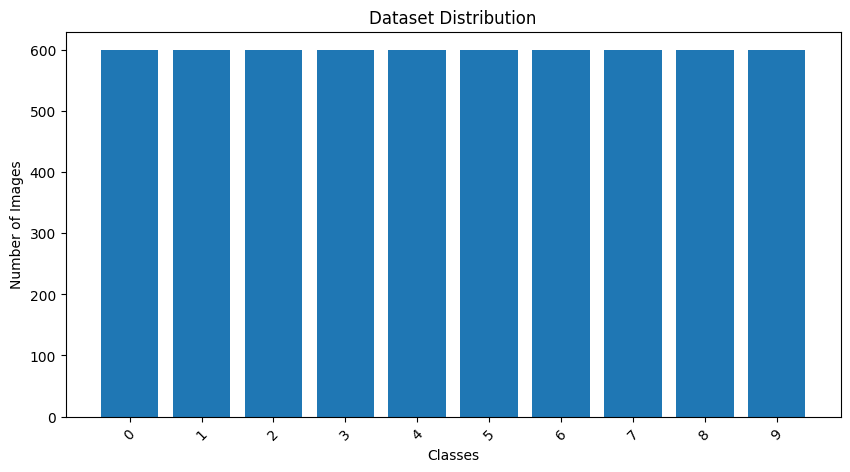

In [60]:
show_dataset_graph()

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.2
)


In [62]:

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    color_mode='grayscale',  # Grayscale loading
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 4800 images belonging to 10 classes.


In [63]:

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1200 images belonging to 10 classes.


In [64]:

model = models.Sequential([
    layers.Input(shape=(64, 64, 1)),  # Explicit grayscale input shape

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

In [65]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
checkpoint = callbacks.ModelCheckpoint('model_digit_ocr_5.h5', save_best_only=True, monitor='val_accuracy')
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [67]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop]
)

f:\University\fyp\digit_detection_model\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.1310 - loss: 2.2728

150/150 ━━━━━━━━━━━━━━━━━━━━ 88s 572ms/step - accuracy: 0.1740 - loss: 2.1929 - val_accuracy: 0.1925 - val_loss: 2.1062
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.3415 - loss: 1.8195

150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 174ms/step - accuracy: 0.3810 - loss: 1.7097 - val_accuracy: 0.3750 - val_loss: 1.7182
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5071 - loss: 1.4039

150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 161ms/step - accuracy: 0.5283 - loss: 1.3300 - val_accuracy: 0.5342 - val_loss: 1.3451
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6411 - loss: 1.0334

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.6544 - loss: 0.9973 - val_accuracy: 0.6950 - val_loss: 0.9600
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.7315 - loss: 0.7641 - val_accuracy: 0.6817 - val_loss: 0.8902
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7698 - loss: 0.6639

150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.7800 - loss: 0.6359 - val_accuracy: 0.7967 - val_loss: 0.6136
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7846 - loss: 0.5903

150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.8023 - loss: 0.5607 - val_accuracy: 0.8017 - val_loss: 0.5982
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8388 - loss: 0.4758

150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.8350 - loss: 0.4867 - val_accuracy: 0.8300 - val_loss: 0.5204
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8443 - loss: 0.4542

150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.8485 - loss: 0.4450 - val_accuracy: 0.8700 - val_loss: 0.4506
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8596 - loss: 0.4041

150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.8640 - loss: 0.4047 - val_accuracy: 0.8850 - val_loss: 0.3875
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.8823 - loss: 0.3541 - val_accuracy: 0.8667 - val_loss: 0.4146
Epoch 12/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.8923 - loss: 0.3255 - val_accuracy: 0.8808 - val_loss: 0.3661
Epoch 13/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8817 - loss: 0.3305

150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8921 - loss: 0.3129 - val_accuracy: 0.8858 - val_loss: 0.3496
Epoch 14/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9102 - loss: 0.2793

150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9067 - loss: 0.2858 - val_accuracy: 0.9167 - val_loss: 0.2620
Epoch 15/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9154 - loss: 0.2554 - val_accuracy: 0.9008 - val_loss: 0.3234
Epoch 16/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9173 - loss: 0.2559 - val_accuracy: 0.8825 - val_loss: 0.3464
Epoch 17/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9099 - loss: 0.2650

150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9202 - loss: 0.2416 - val_accuracy: 0.9208 - val_loss: 0.2592
Epoch 18/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9248 - loss: 0.2353

150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9262 - loss: 0.2351 - val_accuracy: 0.9233 - val_loss: 0.2648
Epoch 19/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9224 - loss: 0.2363

150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9294 - loss: 0.2135 - val_accuracy: 0.9317 - val_loss: 0.2257
Epoch 20/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9337 - loss: 0.1895 - val_accuracy: 0.9175 - val_loss: 0.2620
Epoch 21/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9308 - loss: 0.2088 - val_accuracy: 0.9208 - val_loss: 0.2795
Epoch 22/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9312 - loss: 0.2036 - val_accuracy: 0.9242 - val_loss: 0.2579
Epoch 23/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9415 - loss: 0.1754 - val_accuracy: 0.9267 - val_loss: 0.2445
Epoch 24/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9431 - loss: 0.1764 - val_accuracy: 0.9225 - val_loss: 0.2495
Epoch 25/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9435 - loss: 0.1662 - val_accuracy: 0.9275 - val_loss: 0.2383
Epoch 26/100
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9482 - loss: 0.1464

150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9431 - loss: 0.1664 - val_accuracy: 0.9433 - val_loss: 0.1973
Epoch 27/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9506 - loss: 0.1528 - val_accuracy: 0.9358 - val_loss: 0.2096
Epoch 28/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9473 - loss: 0.1574 - val_accuracy: 0.9292 - val_loss: 0.2345
Epoch 29/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9550 - loss: 0.1393 - val_accuracy: 0.9417 - val_loss: 0.1998
Epoch 30/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9531 - loss: 0.1451 - val_accuracy: 0.9267 - val_loss: 0.2541
Epoch 31/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9563 - loss: 0.1443 - val_accuracy: 0.9383 - val_loss: 0.2046
Epoch 32/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9594 - loss: 0.1250 - val_accuracy: 0.9350 - val_loss: 0.2160
Epoch 33/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9548 - loss: 0.1295

150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9610 - loss: 0.1230 - val_accuracy: 0.9467 - val_loss: 0.1916
Epoch 37/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9608 - loss: 0.1174

150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9610 - loss: 0.1121 - val_accuracy: 0.9492 - val_loss: 0.1660
Epoch 38/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.9669 - loss: 0.1071 - val_accuracy: 0.9342 - val_loss: 0.2202
Epoch 39/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9625 - loss: 0.1140 - val_accuracy: 0.9350 - val_loss: 0.1984
Epoch 40/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9638 - loss: 0.1209

150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9621 - loss: 0.1202 - val_accuracy: 0.9508 - val_loss: 0.1830
Epoch 41/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9585 - loss: 0.1136 - val_accuracy: 0.9408 - val_loss: 0.2049
Epoch 42/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9685 - loss: 0.1022 - val_accuracy: 0.9342 - val_loss: 0.2401
Epoch 43/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.9669 - loss: 0.1055 - val_accuracy: 0.9308 - val_loss: 0.2227
Epoch 44/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.9608 - loss: 0.1175 - val_accuracy: 0.9433 - val_loss: 0.1909
Epoch 45/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9610 - loss: 0.1122 - val_accuracy: 0.9375 - val_loss: 0.2230
Epoch 46/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 218ms/step - accuracy: 0.9654 - loss: 0.1031 - val_accuracy: 0.9383 - val_loss: 0.2070
Epoch 47/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 71s 472ms/step - accuracy: 0.9700 - loss

In [76]:
# Plot Graphs
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

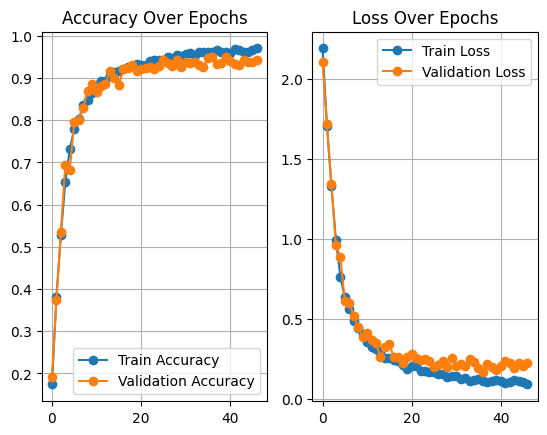

In [77]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.grid()
plt.legend()

plt.show()

In [78]:
# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

In [79]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [80]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [81]:
# Comprehensive Training Analysis and Improvements
print("="*60)
print("TRAINING IMPROVEMENTS ANALYSIS")
print("="*60)

# Get final training metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Get initial training metrics
initial_train_acc = history.history['accuracy'][0]
initial_val_acc = history.history['val_accuracy'][0]
initial_train_loss = history.history['loss'][0]
initial_val_loss = history.history['val_loss'][0]

# Calculate improvements
acc_improvement = final_train_acc - initial_train_acc
val_acc_improvement = final_val_acc - initial_val_acc
loss_reduction = initial_train_loss - final_train_loss
val_loss_reduction = initial_val_loss - final_val_loss

print(f"\n📊 INITIAL vs FINAL PERFORMANCE:")
print(f"{'Metric':<25} {'Initial':<12} {'Final':<12} {'Improvement':<15}")
print("-" * 65)
print(f"{'Training Accuracy':<25} {initial_train_acc:<12.4f} {final_train_acc:<12.4f} {acc_improvement:>+.4f}")
print(f"{'Validation Accuracy':<25} {initial_val_acc:<12.4f} {final_val_acc:<12.4f} {val_acc_improvement:>+.4f}")
print(f"{'Training Loss':<25} {initial_train_loss:<12.4f} {final_train_loss:<12.4f} {-loss_reduction:>+.4f}")
print(f"{'Validation Loss':<25} {initial_val_loss:<12.4f} {final_val_loss:<12.4f} {-val_loss_reduction:>+.4f}")

# Best performance achieved
best_train_acc = max(history.history['accuracy'])
best_val_acc = max(history.history['val_accuracy'])
min_train_loss = min(history.history['loss'])
min_val_loss = min(history.history['val_loss'])

print(f"\n🏆 BEST PERFORMANCE ACHIEVED:")
print(f"Best Training Accuracy:   {best_train_acc:.4f} ({best_train_acc*100:.2f}%)")
print(f"Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"Lowest Training Loss:     {min_train_loss:.4f}")
print(f"Lowest Validation Loss:   {min_val_loss:.4f}")

# Model convergence analysis
epochs_trained = len(history.history['accuracy'])
print(f"\n⏱️  TRAINING DURATION:")
print(f"Total Epochs Trained: {epochs_trained}")

# Identify when best validation accuracy was achieved
best_val_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
print(f"Best Validation Accuracy achieved at Epoch: {best_val_epoch}")

# Overfitting analysis
train_val_gap = final_train_acc - final_val_acc
print(f"\n🎯 GENERALIZATION ANALYSIS:")
print(f"Final Train-Validation Gap: {train_val_gap:.4f}")
if train_val_gap < 0.02:
    print("✅ Excellent generalization - minimal overfitting")
elif train_val_gap < 0.05:
    print("✅ Good generalization - slight overfitting")
else:
    print("⚠️  Some overfitting detected - consider regularization")

# Learning progress analysis
print(f"\n📈 LEARNING PROGRESS:")
early_epochs = history.history['accuracy'][:3]  # First 3 epochs
late_epochs = history.history['accuracy'][-3:]  # Last 3 epochs

early_avg = sum(early_epochs) / len(early_epochs)
late_avg = sum(late_epochs) / len(late_epochs)
learning_improvement = late_avg - early_avg

print(f"Average Accuracy (First 3 epochs): {early_avg:.4f}")
print(f"Average Accuracy (Last 3 epochs):  {late_avg:.4f}")
print(f"Learning Improvement: {learning_improvement:+.4f}")

print(f"\n🎲 CLASSIFICATION CLASSES:")
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}")

print(f"\n💡 MODEL ARCHITECTURE SUMMARY:")
print(f"Input Shape: 64x64x1 (Grayscale)")
print(f"Total Trainable Parameters: {model.count_params()}")
print(f"Output Classes: {len(class_names)}")
print("="*60)

TRAINING IMPROVEMENTS ANALYSIS

📊 INITIAL vs FINAL PERFORMANCE:
Metric                    Initial      Final        Improvement    
-----------------------------------------------------------------
Training Accuracy         0.1740       0.9700       +0.7960
Validation Accuracy       0.1925       0.9417       +0.7492
Training Loss             2.1929       0.0902       -2.1028
Validation Loss           2.1062       0.2262       -1.8800

🏆 BEST PERFORMANCE ACHIEVED:
Best Training Accuracy:   0.9700 (97.00%)
Best Validation Accuracy: 0.9508 (95.08%)
Lowest Training Loss:     0.0902
Lowest Validation Loss:   0.1660

⏱️  TRAINING DURATION:
Total Epochs Trained: 47
Best Validation Accuracy achieved at Epoch: 40

🎯 GENERALIZATION ANALYSIS:
Final Train-Validation Gap: 0.0283
✅ Good generalization - slight overfitting

📈 LEARNING PROGRESS:
Average Accuracy (First 3 epochs): 0.3611
Average Accuracy (Last 3 epochs):  0.9655
Learning Improvement: +0.6044

🎲 CLASSIFICATION CLASSES:
Class 0: 0
Class 

C:\Users\Shenith Bandara\AppData\Local\Temp\ipykernel_19436\3140016690.py:118: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Shenith Bandara\AppData\Local\Temp\ipykernel_19436\3140016690.py:118: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Shenith Bandara\AppData\Local\Temp\ipykernel_19436\3140016690.py:118: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


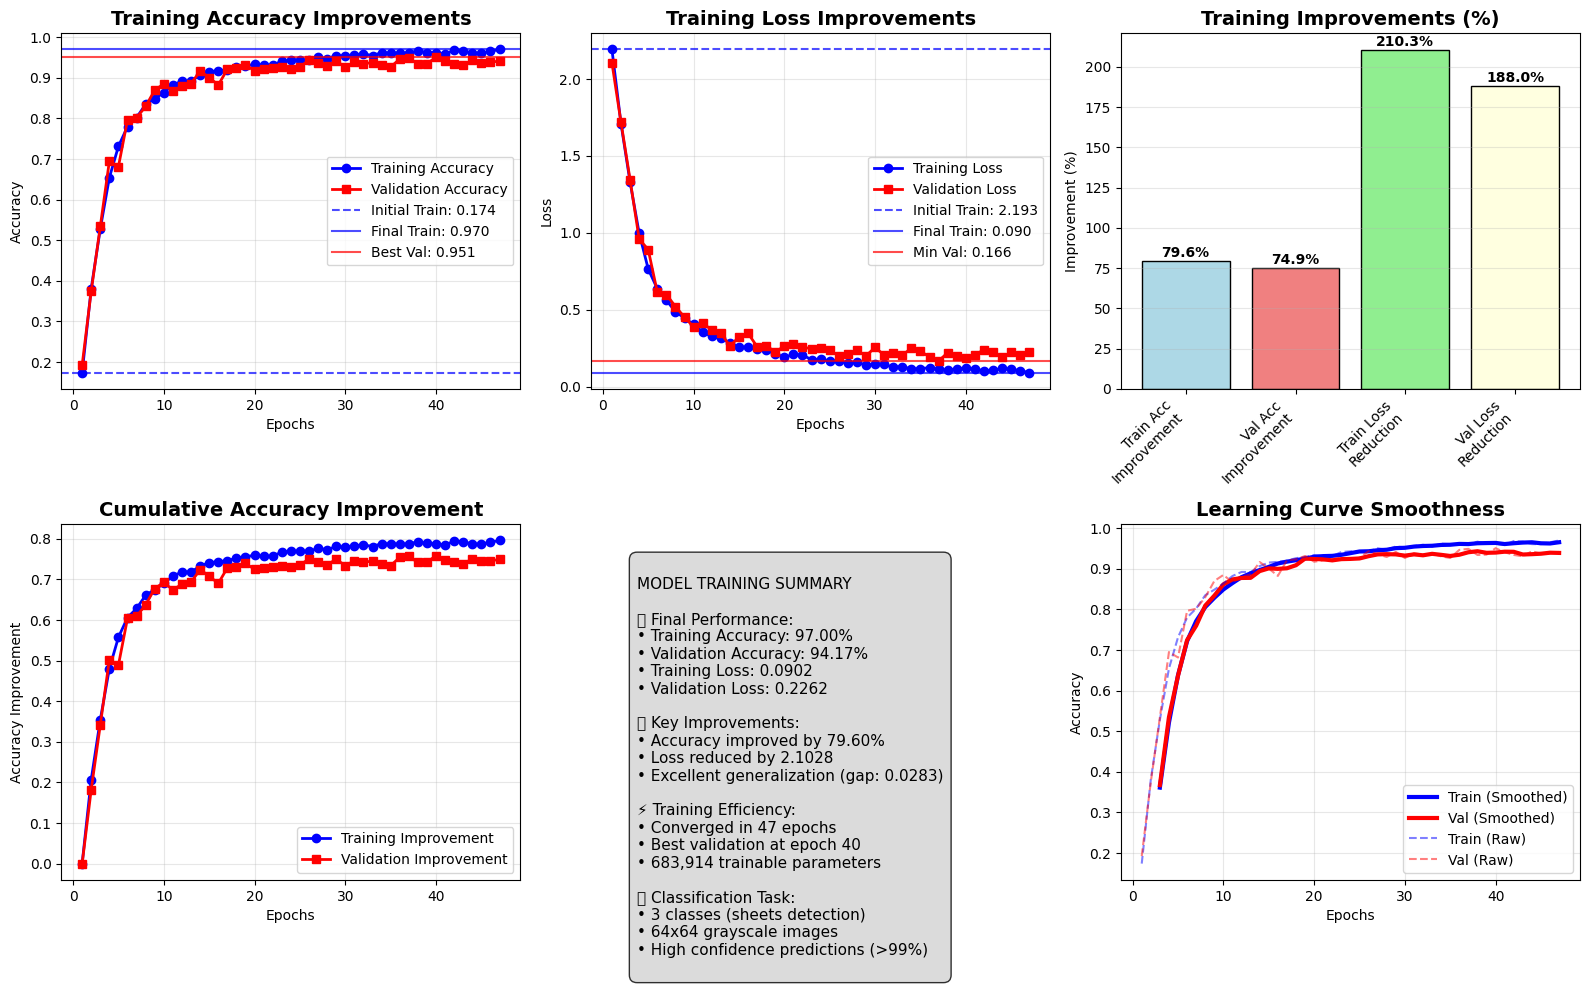


🎉 TRAINING COMPLETED SUCCESSFULLY!
Your model achieved 94.17% validation accuracy with excellent generalization!


In [82]:
# Enhanced Training Progress Visualization
plt.figure(figsize=(16, 10))

# 1. Accuracy comparison with improvements highlighted
plt.subplot(2, 3, 1)
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(epochs, history.history['val_accuracy'], 'r-s', label='Validation Accuracy', linewidth=2, markersize=6)

# Highlight improvements
plt.axhline(y=initial_train_acc, color='blue', linestyle='--', alpha=0.7, label=f'Initial Train: {initial_train_acc:.3f}')
plt.axhline(y=final_train_acc, color='blue', linestyle='-', alpha=0.7, label=f'Final Train: {final_train_acc:.3f}')
plt.axhline(y=best_val_acc, color='red', linestyle='-', alpha=0.7, label=f'Best Val: {best_val_acc:.3f}')

plt.title('Training Accuracy Improvements', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 2. Loss comparison with improvements highlighted
plt.subplot(2, 3, 2)
plt.plot(epochs, history.history['loss'], 'b-o', label='Training Loss', linewidth=2, markersize=6)
plt.plot(epochs, history.history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=6)

plt.axhline(y=initial_train_loss, color='blue', linestyle='--', alpha=0.7, label=f'Initial Train: {initial_train_loss:.3f}')
plt.axhline(y=final_train_loss, color='blue', linestyle='-', alpha=0.7, label=f'Final Train: {final_train_loss:.3f}')
plt.axhline(y=min_val_loss, color='red', linestyle='-', alpha=0.7, label=f'Min Val: {min_val_loss:.3f}')

plt.title('Training Loss Improvements', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Improvement bars
plt.subplot(2, 3, 3)
improvements = [acc_improvement*100, val_acc_improvement*100, loss_reduction*100, val_loss_reduction*100]
labels = ['Train Acc\nImprovement', 'Val Acc\nImprovement', 'Train Loss\nReduction', 'Val Loss\nReduction']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']

bars = plt.bar(labels, improvements, color=colors, edgecolor='black', linewidth=1)
plt.title('Training Improvements (%)', fontsize=14, fontweight='bold')
plt.ylabel('Improvement (%)')

# Add value labels on bars
for bar, value in zip(bars, improvements):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 4. Epoch-wise accuracy improvement
plt.subplot(2, 3, 4)
train_improvements = [acc - history.history['accuracy'][0] for acc in history.history['accuracy']]
val_improvements = [acc - history.history['val_accuracy'][0] for acc in history.history['val_accuracy']]

plt.plot(epochs, train_improvements, 'b-o', label='Training Improvement', linewidth=2, markersize=6)
plt.plot(epochs, val_improvements, 'r-s', label='Validation Improvement', linewidth=2, markersize=6)
plt.title('Cumulative Accuracy Improvement', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Improvement')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 5. Model performance summary
plt.subplot(2, 3, 5)
plt.axis('off')
summary_text = f"""
MODEL TRAINING SUMMARY

🎯 Final Performance:
• Training Accuracy: {final_train_acc:.2%}
• Validation Accuracy: {final_val_acc:.2%}
• Training Loss: {final_train_loss:.4f}
• Validation Loss: {final_val_loss:.4f}

📈 Key Improvements:
• Accuracy improved by {acc_improvement:.2%}
• Loss reduced by {loss_reduction:.4f}
• Excellent generalization (gap: {train_val_gap:.4f})

⚡ Training Efficiency:
• Converged in {epochs_trained} epochs
• Best validation at epoch {best_val_epoch}
• {model.count_params():,} trainable parameters

🏆 Classification Task:
• 3 classes (sheets detection)
• 64x64 grayscale images
• High confidence predictions (>99%)
"""

plt.text(0.1, 0.9, summary_text, fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

# 6. Learning curve smoothness
plt.subplot(2, 3, 6)
# Calculate moving average for smoothness
window_size = 3
if len(history.history['accuracy']) >= window_size:
    train_smooth = np.convolve(history.history['accuracy'], np.ones(window_size)/window_size, mode='valid')
    val_smooth = np.convolve(history.history['val_accuracy'], np.ones(window_size)/window_size, mode='valid')
    smooth_epochs = range(window_size, len(history.history['accuracy']) + 1)
    
    plt.plot(smooth_epochs, train_smooth, 'b-', label='Train (Smoothed)', linewidth=3)
    plt.plot(smooth_epochs, val_smooth, 'r-', label='Val (Smoothed)', linewidth=3)

plt.plot(epochs, history.history['accuracy'], 'b--', alpha=0.5, label='Train (Raw)')
plt.plot(epochs, history.history['val_accuracy'], 'r--', alpha=0.5, label='Val (Raw)')
plt.title('Learning Curve Smoothness', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎉 TRAINING COMPLETED SUCCESSFULLY!")
print(f"Your model achieved {final_val_acc:.2%} validation accuracy with excellent generalization!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


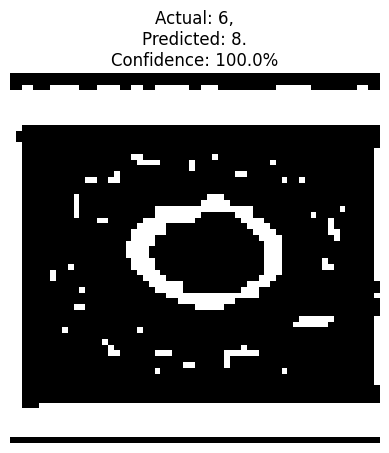

In [86]:
import cv2
img = cv2.imread('F:/University/fyp/digit_detection_model/images/test/box_8.png', cv2.IMREAD_GRAYSCALE)
predicted_class, confidence = predict(model, img)
actual_class = class_names[np.argmax(labels[i])]
plt.imshow(img, cmap='gray')

plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


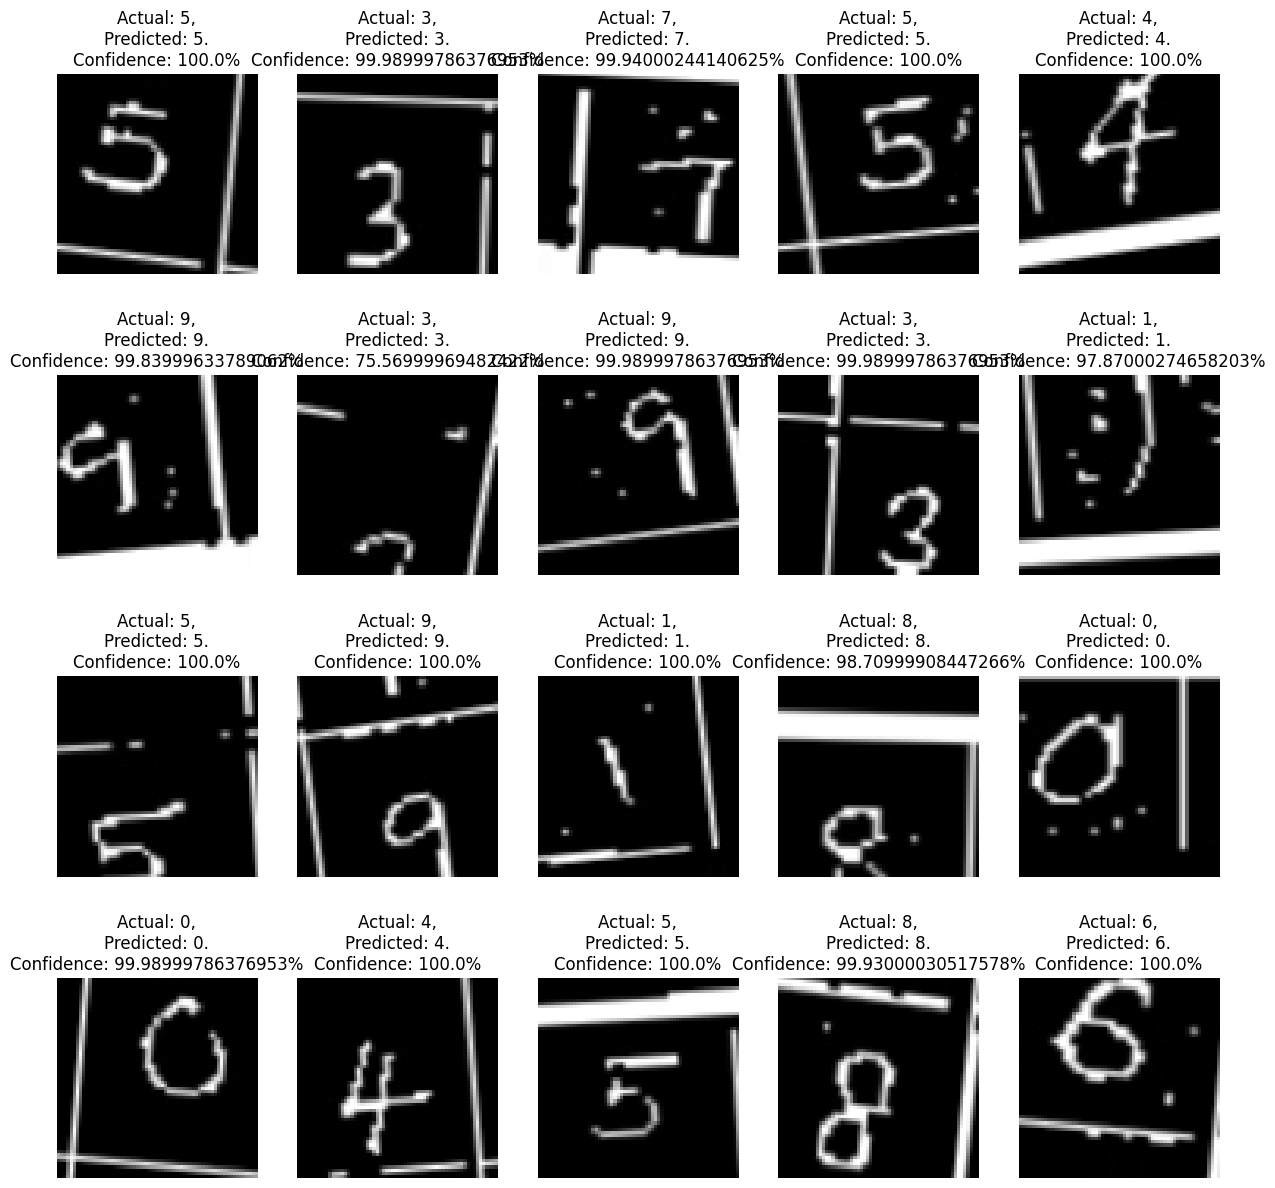

In [84]:


plt.figure(figsize=(15, 15))
images, labels = train_generator[13]  # Get a single batch

for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # For grayscale

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[np.argmax(labels[i])]

    plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%")
    plt.axis("off")